In [1]:
#!/usr/bin/python3.8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.signal import find_peaks
# import tensorflow as tf
from sklearn.model_selection import train_test_split


%matplotlib notebook

In [2]:
# ================= CONSTANTS =================
PMT_PULSE_LENGTH = 1500  # Sample lenght of a typical pulse
SAMPLES_BEFORE_PEAK = 4  # Samples to store before peak detection. MUST BE SMALLER THAN 8

In [19]:
df=pd.read_csv("/home/ivan/cernbox/bothSources_t125_s65534_hv2000/20210813_split/20210813_170419/20210813_170419_0.csv", index_col=0)

In [20]:
df

TBP:68768  TBP:65552  TBP:67791  TBP:66277  TBP:66355  TBP:68252  \
0            137        137        137        137        136        137   
1            136        136        136        136        135        136   
2            137        134        137        136        136        137   
3            136        131        136        135        136        135   
4            137        129        137        136        136        136   
...          ...        ...        ...        ...        ...        ...   
65529        137        120        135        136        135        135   
65530        137        128        136        137        137        136   
65531        136        131        136        136        136        136   
65532        136        117        136        137        137        137   
65533        136        113        136        135        135        137   

       TBP:65627  TBP:69497  TBP:65816  TBP:65632  ...  TBP:66632  TBP:66398  \
0            136        137        136        137  ...        136        137   
1            136        136        136        136  ...        137        136   
2            137        136        137        136  ...        137        136   
3            136        136        136        136  ...        136        136   
4            137        137        137        136  ...        136        137   
...          ...        ...        ...        ...  ...        ...        ...   
65529        136        136        136        136  ...        136        136   
65530        136        136        136        136  ...        136        136   
65531        136        136        135        136  ...        136        136   
65532        136        136        136        136  ...        136        137   
65533        136        136        135        135  ...        136        136   

       TBP:67410  TBP:65737  TBP:66968  TBP:67014  TBP:66000  TBP:69558  \
0            136        136        136        136        137        136   
1            136        136        135        136        136        135   
2            137        136        136        137        136        136   
3            136        136        135        136        136        135   
4            135        137        137        136        137        136   
...          ...        ...        ...        ...        ...        ...   
65529        136        136        136        136        135        136   
65530        137        137        136        137        137        136   
65531        136        136        136        135        136        136   
65532        137        137        137        136        136        136   
65533        136        136        136        135        136        136   

       TBP:70074  TBP:65769  
0            136        136  
1            136        136  
2            136        137  
3            136        136  
4            136        136  
...          ...        ...  
65529        136        136  
65530        136        137  
65531        136        135  
65532        137        136  
65533        135        135  

[65534 rows x 812 columns]

In [19]:
df2=df.iloc[:PMT_PULSE_LENGTH].copy()
df2=(df2-np.mean(df2))/np.std(df2)
df2

TBP:65686  TBP:65707  TBP:65682  TBP:65541  TBP:65631  TBP:66079  \
0     -0.013708  -0.023131  -0.157923  -1.908407   0.128066  -0.135742   
1     -0.013708  -0.023131  -0.157923  -0.710216  -1.178726  -0.135742   
2      0.573770  -0.023131   1.075847  -0.577084  -2.921116   0.781433   
3     -0.601186   0.731135  -0.157923  -0.443952  -3.356713  -0.135742   
4      0.573770   0.731135  -0.157923   0.221710  -2.049921   0.781433   
...         ...        ...        ...        ...        ...        ...   
1495   0.573770  -0.023131  -1.391692   0.487974   0.128066  -0.135742   
1496   0.573770   0.731135  -0.157923   0.621107   0.563663   0.781433   
1497  -0.013708  -0.023131  -1.391692   0.487974   0.128066  -1.052917   
1498   0.573770  -0.023131  -0.157923   0.621107   0.128066  -0.135742   
1499  -0.601186  -0.023131  -0.157923   0.487974   0.128066  -0.135742   

      TBP:65555  TBP:65888  TBP:65550  TBP:65678  ...  TBP:65847  TBP:65976  \
0      0.452700   0.857131  -0.656954   0.118473  ...   0.671910   0.587168   
1      0.452700  -0.107382  -0.481641   0.118473  ...  -0.068079   0.013388   
2      0.452700   0.857131  -0.131017   0.118473  ...  -0.808068   0.587168   
3      0.452700  -0.107382  -0.131017   0.118473  ...  -0.068079   0.013388   
4      0.623702  -0.107382   0.219608   0.594907  ...  -0.068079   0.587168   
...         ...        ...        ...        ...  ...        ...        ...   
1495  -2.283337  -0.107382   0.394920  -0.357961  ...  -0.068079   0.013388   
1496  -1.941332  -0.107382   0.570232   0.118473  ...  -0.068079   0.013388   
1497  -2.112335  -0.107382   0.394920  -0.357961  ...  -0.068079   0.013388   
1498  -2.796344   0.857131   0.394920   0.594907  ...   0.671910   0.013388   
1499  -3.822358  -0.107382   0.394920   0.118473  ...  -0.068079   0.013388   

      TBP:65923  TBP:66150  TBP:68134  TBP:66335  TBP:66112  TBP:66070  \
0      0.554696  -0.013694   0.433437   0.049994   0.914655   0.442621   
1      0.554696  -0.013694   0.433437   0.049994  -0.094898   0.442621   
2      0.620533   0.842202   0.550985   0.049994  -0.094898   0.442621   
3      0.554696  -0.869591   0.433437   0.049994  -0.094898   0.442621   
4      0.620533   0.842202   0.315890   0.737979  -1.104451   0.516342   
...         ...        ...        ...        ...        ...        ...   
1495   0.554696  -0.869591   0.433437   0.049994   0.914655   0.295179   
1496   0.554696  -0.013694   0.433437   0.049994  -0.094898   0.442621   
1497   0.554696  -0.013694   0.433437   0.049994  -0.094898   0.368900   
1498   0.554696   0.842202   0.550985   0.049994   0.914655   0.368900   
1499   0.488860  -0.013694   0.315890   0.049994  -0.094898   0.442621   

      TBP:66130  TBP:69385  
0     -0.016112   0.727834  
1     -0.016112  -0.004885  
2      0.588088  -0.004885  
3     -0.016112  -0.004885  
4     -0.016112  -0.004885  
...         ...        ...  
1495  -0.620313  -0.004885  
1496  -0.016112   0.727834  
1497   0.588088  -0.004885  
1498   0.588088   0.727834  
1499  -0.016112  -0.004885  

[1500 rows x 790 columns]

<IPython.core.display.Javascript object>


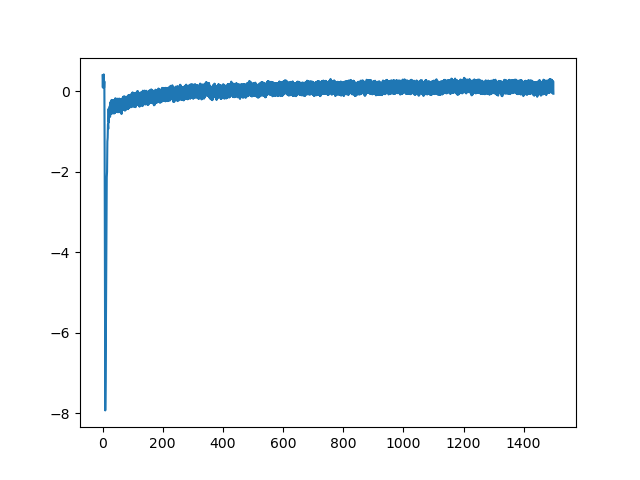

In [6]:
%matplotlib notebook
mod=np.mean(df2.T)
plt.plot(mod)

# FIR Integrated

In [21]:
def pkdetect(x, thr=100, pkh=10):
    peak=[]
    lmax=0
    imax=0
    count=0
    for i in range(1,len(x)):
        if x[i] <= thr:
            pass
        elif x[i] > lmax:
            imax=i
            lmax=x[i]
        elif ((lmax-x[i-1]) > pkh) and (x[i]-x[i-1])>0:
            peak.append(imax)
            lmax=0
        else:
            pass
            
    return peak

In [11]:
thr=1000
pkh=100000
%matplotlib notebook      
pkamp=[]
for c in df.columns[:]:
    x=df[c].to_numpy()
    fir=np.convolve(x,np.flip(mod), "valid")
    intg=np.convolve(fir,np.full(1000,1))
    peak=pkdetect(intg, thr, pkh)
    pkamp=np.append(pkamp,intg[peak])
plt.plot(intg)
plt.plot(peak,intg[peak],".")
plt.show()
# sns.histplot(data=pkamp, kde=True)

NameError: name 'mod' is not defined

In [ ]:
%matplotlib notebook
# sns.histplot(data=pkamp, kde=True)
plt.hist(pkamp)
plt.show()

In [ ]:
df2=pd.DataFrame(pkamp, columns=["Co60"])
df2.to_csv("../FIR_Integrated_Co60_mod3.csv")
df2

# Only FIR

<IPython.core.display.Javascript object>


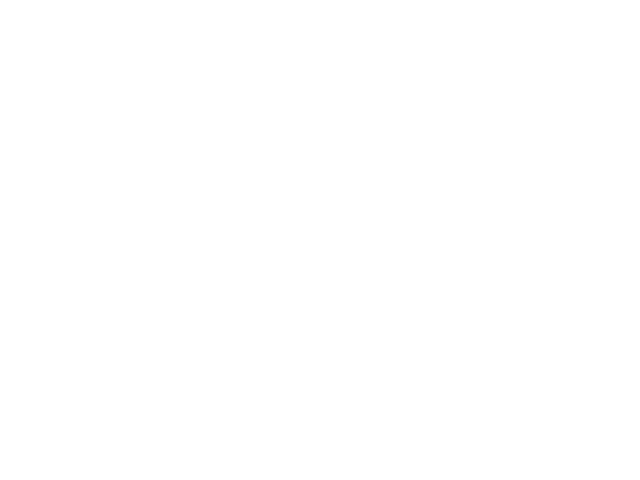

In [13]:
thr=100
pkh=1000
%matplotlib notebook      
pkamp=[]
# for c in df.columns[:10]:
for c in df.columns[:]:
    x=df[c].to_numpy()
    fir=np.convolve(x,np.flip(mod), "valid")
    peak=pkdetect(fir, thr, pkh)
    pkamp=np.append(pkamp,fir[peak])
plt.plot(fir)
plt.plot(peak,fir[peak],".")
plt.plot(x[10:])
plt.plot(peak, x[10:][peak], ".")
# sns.histplot(data=pkamp, kde=True)

In [14]:
df2=pd.DataFrame(pkamp, columns=["Co60"])
df2.to_csv("../FIR_Co60_mod3.csv")
df2

Co60
0        877.152152
1        879.490841
2       9201.530556
3       8611.456360
4       6744.568687
...             ...
157189  5118.787171
157190  4011.369417
157191  4136.388659
157192  3405.485836
157193  3523.288909

[157194 rows x 1 columns]

<IPython.core.display.Javascript object>


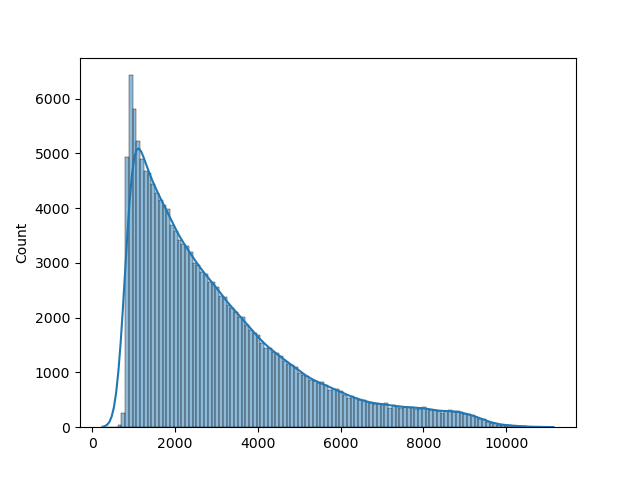

In [15]:
%matplotlib notebook
sns.histplot(data=pkamp, kde=True)
plt.show()

<IPython.core.display.Javascript object>


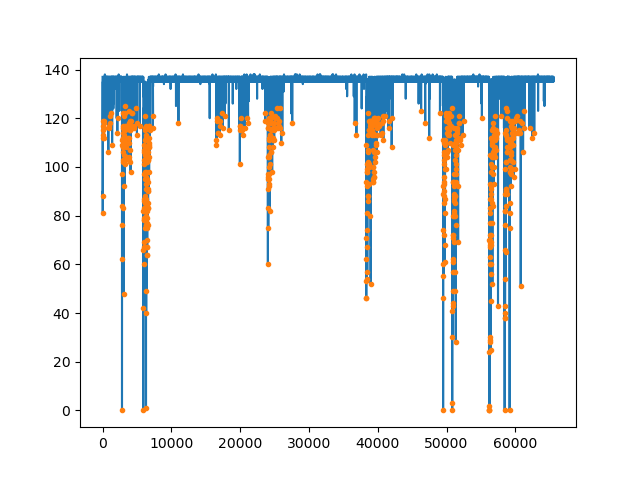

In [9]:
%matplotlib notebook
data=max(x)-x
# plt.plot(data)
xpeak=pkdetect(data,10, 10)
plt.plot(x)
plt.plot(xpeak, x[xpeak],".")
plt.show()

In [17]:
xpeak

[10,
 35,
 51,
 63,
 76,
 81,
 103,
 121,
 127,
 131,
 157,
 189,
 196,
 222,
 228,
 232,
 259,
 277,
 286,
 292,
 301,
 326,
 357,
 367,
 432,
 508,
 1230,
 4586,
 4594,
 4613,
 4622,
 4645,
 4657,
 4669,
 4693,
 4700,
 4749,
 4767,
 4777,
 4817,
 4834,
 4875,
 4916,
 4989,
 5015,
 5263,
 5389,
 5411,
 5433,
 5505,
 5775,
 6643,
 7255,
 11704,
 12177,
 15117,
 15120,
 15124,
 15128,
 15136,
 15141,
 15148,
 15154,
 15163,
 15178,
 15186,
 15190,
 15198,
 15202,
 15209,
 15213,
 15221,
 15231,
 15243,
 15257,
 15271,
 15286,
 15296,
 15306,
 15315,
 15327,
 15334,
 15341,
 15351,
 15358,
 15362,
 15367,
 15377,
 15387,
 15394,
 15408,
 15419,
 15431,
 15443,
 15457,
 15474,
 15487,
 15504,
 15514,
 15525,
 15529,
 15539,
 15555,
 15572,
 15583,
 15596,
 15600,
 15603,
 15609,
 15614,
 15624,
 15645,
 15649,
 15661,
 15671,
 15685,
 15707,
 15730,
 15751,
 15779,
 15782,
 15788,
 15799,
 15826,
 15842,
 15855,
 15867,
 15898,
 15910,
 15923,
 15938,
 15951,
 15979,
 15986,
 15992,
 1600

In [12]:
#Isolating individual pulses within a trace

def isolatePulses(singleTrace, peakIndexesList, pulseLength, samplesBeforePeak):
    singleTrace = singleTrace.tolist()
    i = 0 #Input pulse index
    outputPulseIndex = 0
    diffFromLastPeak = pulseLength #In order to classify the first pulse as a valid event
    isolatedPulses = [] #Output variable (list of pulse samples) that stores each valid pulse
    
    #Be sure to slide along the whole trace, avoiding short pulses located at the end
    while ((i < len(peakIndexesList)) and (peakIndexesList[i] <= len(singleTrace) - pulseLength)):
        #print("Diff from last peak: " + str(diffFromLastPeak))
        if(diffFromLastPeak >= pulseLength):
            lowerPulseRange = peakIndexesList[i] - samplesBeforePeak #Be sure to record some samples before peak
            upperPulseRange = lowerPulseRange + pulseLength #Store the whole pulse
            isolatedPulses.append([])
            isolatedPulses[outputPulseIndex].extend(singleTrace[lowerPulseRange:upperPulseRange])
            #print("OutputPulseIndex: " + str(outputPulseIndex))
            outputPulseIndex += 1
            diffFromLastPeak = 0
        i += 1
        if i < len(peakIndexesList):
            diffFromLastPeak += peakIndexesList[i] - peakIndexesList[i-1] #Check if peaks are distant enough
            
        else:
            break
    
    return isolatedPulses
        

In [13]:
#Isolating individual pulses within a trace using multithreading

def isolatePulsesMP(singleTrace, peakIndexesList, pulseLength, samplesBeforePeak, queue):
    singleTrace = singleTrace.tolist()
    i = 0 #Input pulse index
    outputPulseIndex = 0
    diffFromLastPeak = pulseLength #In order to classify the first pulse as a valid event
    isolatedPulses = [] #Output variable (list of pulse samples) that stores each valid pulse
    
    #Be sure to slide along the whole trace, avoiding short pulses located at the end
    while ((i < len(peakIndexesList)) and (peakIndexesList[i] <= len(singleTrace) - pulseLength)):
        #print("Diff from last peak: " + str(diffFromLastPeak))
        if(diffFromLastPeak >= pulseLength):
            lowerPulseRange = peakIndexesList[i] - samplesBeforePeak #Be sure to record some samples before peak
            upperPulseRange = lowerPulseRange + pulseLength #Store the whole pulse
            isolatedPulses.append([])
            isolatedPulses[outputPulseIndex].extend(singleTrace[lowerPulseRange:upperPulseRange])
            #print("OutputPulseIndex: " + str(outputPulseIndex))
            outputPulseIndex += 1
            diffFromLastPeak = 0
        i += 1
        if i < len(peakIndexesList):
            diffFromLastPeak += peakIndexesList[i] - peakIndexesList[i-1] #Check if peaks are distant enough
            
        else:
            break
        
        queue.put(isolatedPulses[1:])
    
#     return isolatedPulses


In [22]:
#Dataframe with individual pulses
dfPulses = pd.DataFrame(columns = [0])

In [23]:
df[df.columns[1]]

0        137
1        136
2        134
3        131
4        129
        ... 
65529    120
65530    128
65531    131
65532    117
65533    113
Name: TBP:65552, Length: 65534, dtype: int64

In [24]:
nPulses = len(df.T)
#Pulses = 10
testList = []
pulseIdx = 0
for i in range(nPulses):
    testList.append([])
    thisTrace = df[df.columns[i]]
    peaksList = pkdetect(thisTrace, 10, 10)
    individualPulses = isolatePulses(thisTrace, peaksList, PMT_PULSE_LENGTH, SAMPLES_BEFORE_PEAK)[1:]
    #print("Individual pulses: " + str(individualPulses))
    print("Processing trace " + str(i + 1) + "/" + str(nPulses))
    for j in individualPulses:
        #print("j: " + str(j))
        dfPulses[pulseIdx] = j
        pulseIdx += 1

Processing trace 1/812
Processing trace 2/812
Processing trace 3/812
Processing trace 4/812
Processing trace 5/812
Processing trace 6/812
Processing trace 7/812
Processing trace 8/812
Processing trace 9/812
Processing trace 10/812
Processing trace 11/812
Processing trace 12/812
Processing trace 13/812
Processing trace 14/812
Processing trace 15/812
Processing trace 16/812
Processing trace 17/812
Processing trace 18/812
Processing trace 19/812
Processing trace 20/812
Processing trace 21/812
Processing trace 22/812
Processing trace 23/812
Processing trace 24/812
Processing trace 25/812
Processing trace 26/812
Processing trace 27/812
Processing trace 28/812
Processing trace 29/812
Processing trace 30/812
Processing trace 31/812
Processing trace 32/812
Processing trace 33/812
Processing trace 34/812
Processing trace 35/812
Processing trace 36/812
Processing trace 37/812
Processing trace 38/812
Processing trace 39/812
Processing trace 40/812
Processing trace 41/812
Processing trace 42/812
P

Processing trace 334/812
Processing trace 335/812
Processing trace 336/812
Processing trace 337/812
Processing trace 338/812
Processing trace 339/812
Processing trace 340/812
Processing trace 341/812
Processing trace 342/812
Processing trace 343/812
Processing trace 344/812
Processing trace 345/812
Processing trace 346/812
Processing trace 347/812
Processing trace 348/812
Processing trace 349/812
Processing trace 350/812
Processing trace 351/812
Processing trace 352/812
Processing trace 353/812
Processing trace 354/812
Processing trace 355/812
Processing trace 356/812
Processing trace 357/812
Processing trace 358/812
Processing trace 359/812
Processing trace 360/812
Processing trace 361/812
Processing trace 362/812
Processing trace 363/812
Processing trace 364/812
Processing trace 365/812
Processing trace 366/812
Processing trace 367/812
Processing trace 368/812
Processing trace 369/812
Processing trace 370/812
Processing trace 371/812
Processing trace 372/812
Processing trace 373/812


Processing trace 662/812
Processing trace 663/812
Processing trace 664/812
Processing trace 665/812
Processing trace 666/812
Processing trace 667/812
Processing trace 668/812
Processing trace 669/812
Processing trace 670/812
Processing trace 671/812
Processing trace 672/812
Processing trace 673/812
Processing trace 674/812
Processing trace 675/812
Processing trace 676/812
Processing trace 677/812
Processing trace 678/812
Processing trace 679/812
Processing trace 680/812
Processing trace 681/812
Processing trace 682/812
Processing trace 683/812
Processing trace 684/812
Processing trace 685/812
Processing trace 686/812
Processing trace 687/812
Processing trace 688/812
Processing trace 689/812
Processing trace 690/812
Processing trace 691/812
Processing trace 692/812
Processing trace 693/812
Processing trace 694/812
Processing trace 695/812
Processing trace 696/812
Processing trace 697/812
Processing trace 698/812
Processing trace 699/812
Processing trace 700/812
Processing trace 701/812


In [25]:
dfPulses

0      1      2      3      4      5      6      7      8      9      \
0        56    134    131    137     92    137    136    135    135    135   
1        67    135    132    136     96    136    135    135    136    130   
2        68    135    132    136     99    136    135    135    136    124   
3        81    136    134    136    104    136    136    136    135    125   
4        90    137    135    138    113    138    137    137    137    128   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1495    136    134    135    136    136    136    135    136    130    136   
1496    136    136    136    137    137    136    136    137    127    136   
1497    135    136    136    136    136    136    136    136    129    136   
1498    136    135    136    136    136    136    137    136    131    136   
1499    136    125    136    136    136    136    136    136    131    137   

      ...  23596  23597  23598  23599  23600  23601  23602  23603  23604  \
0     ...    137    136    136    136    137    136    137    121    136   
1     ...    136    136    129    136    135    136    136    126    135   
2     ...    136    136    123    137    136    137    137    127    136   
3     ...    136    136    125    136    136    136    136    131    135   
4     ...    138    137    128    138    138    138    138    132    137   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1495  ...    137    136    134    136    136    136    133    137    136   
1496  ...    137    137    132    136    137    136    128    136    136   
1497  ...    136    136    136    135    135    135    124    136    137   
1498  ...    136    136    136    137    136    137    125    136    137   
1499  ...    136    136    135    136    136    135    128    136    136   

      23605  
0       136  
1       136  
2       136  
3       136  
4       137  
...     ...  
1495    136  
1496    137  
1497    136  
1498    137  
1499    136  

[1500 rows x 23606 columns]

In [26]:
dfPulses.to_csv("../PeakDetection_MultiSources_IndividualPulses2kV.csv")

<IPython.core.display.Javascript object>


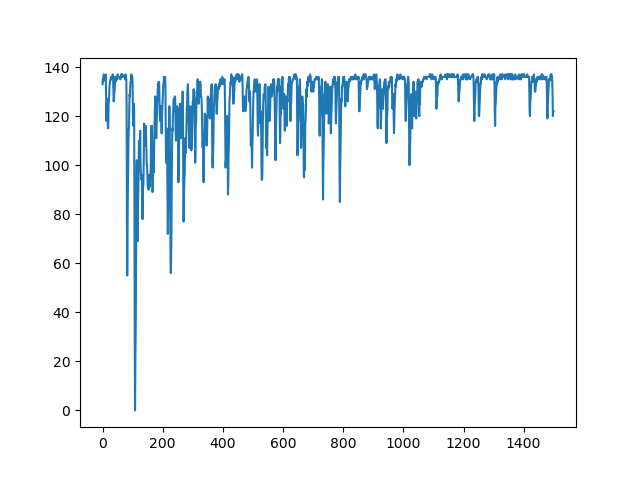

In [27]:
%matplotlib notebook

nPlots = 1
startIndex = 2000


ax = plt.plot(dfPulses[dfPulses.columns[startIndex]])

for i in range(nPlots - 1):
    plt.plot(dfPulses[dfPulses.columns[startIndex + 1 + i]])
    plt.plot()

In [28]:
def singlePulseToArea(singlePulse):
    newPulse = max(singlePulse) - singlePulse
    return sum(newPulse)

In [29]:
dfAreas = pd.DataFrame(columns = ["MultiSources"])

In [30]:
dfAreas["MultiSources"] = dfPulses.apply(singlePulseToArea, axis = 0)

In [31]:
dfAreas

MultiSources
0             15239
1             16710
2              9328
3              3034
4             13355
...             ...
23601          2823
23602          3340
23603          8162
23604          1674
23605          2955

[23606 rows x 1 columns]

In [32]:
dfAreas.to_csv("../PeakDetection_MultiSources_Areas2kV.csv")

<IPython.core.display.Javascript object>


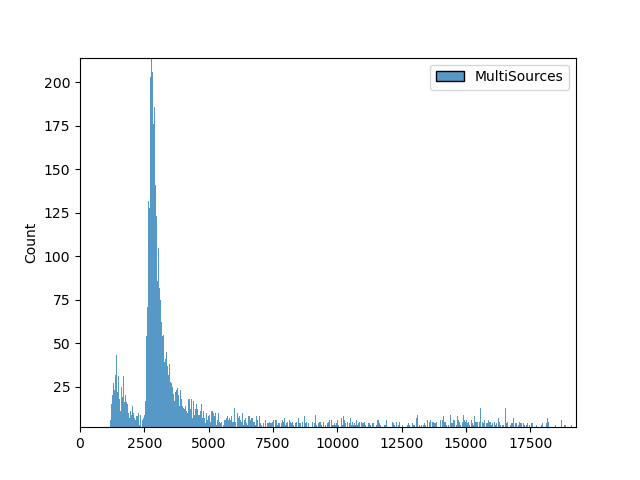

In [35]:
%matplotlib notebook
sns.histplot(dfAreas, bins = 17500)
plt.show()

<IPython.core.display.Javascript object>


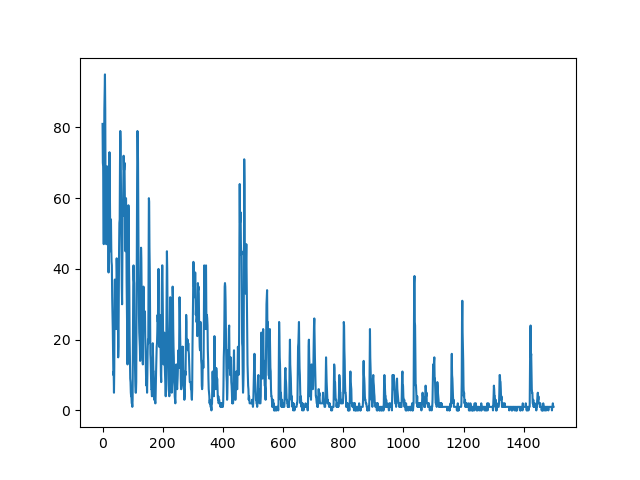

In [34]:
%matplotlib notebook
dfMax = max(dfPulses[dfPulses.columns[0]])
dfNew = dfMax - dfPulses[dfPulses.columns[0]]
plt.plot(dfNew)
plt.show()